# Using the Scikit-Learn Wrapper

A no-fuss way of using Bingo is by using the scikit-learn wrapper:
`SymbolicRegressor`. Let's setup a test case to show how it works.

## Setting Up the Regressor

There are many options that can be set in `SymbolicRegressor`. Here we set some basic ones including
`population_size` (the number of equations in a population), `stack_size` (the max number of nodes per equation), and `use_simplification`
(whether to use simplification to speed up equation evaluation and for easier reading). You can see all of `SymbolicRegressor`'s
options [here](../_apidocs/bingo.symbolic_regression.html#module-bingo.symbolic_regression.symbolic_regressor).

In [1]:
from bingo.symbolic_regression.symbolic_regressor import SymbolicRegressor
regressor = SymbolicRegressor(population_size=100, stack_size=16,
                              use_simplification=True)

C:\Users\David\Desktop\GPSR Research\bingoNASAFork\bingo\symbolic_regression\__init__.py:31: UserWarning: Could not load C++ modules cannot import name 'AGraph' from 'bingocpp' (unknown location)
  warnings.warn(f"Could not load C++ modules {import_err}")


## Training Data
Here we're just creating some dummy training data from the equation $5.0 X_0^2 + 3.5 X_0$. More on training data can be found
in the [data formatting guide](data_formatting.html).

In [2]:
import numpy as np
X_0 = np.linspace(-10, 10, num=30).reshape((-1, 1))
X = np.array(X_0)
y = 5.0 * X_0 ** 2 + 3.5 * X_0

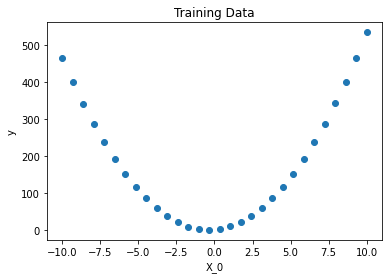

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("X_0")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

## Fitting the Regressor

Fitting is as simple as calling the `.fit()` method.

In [4]:
regressor.fit(X, y)

using 1 processes
generating population
finished generating population


 Generating a diverse population took 333 iterations.
archipelago: <class 'bingo.evolutionary_optimizers.island.Island'>
Generation: 0, Best fitness: 222.70114942528738


Generation: 10, Best fitness: 6.672810051242618e-28
done with opt, best_ind: (X_0)(3.500000000000001 + X_0 + (4.0)(X_0)), fitness: 6.672810051242618e-28
reran CLO, best_ind: (X_0)(3.5000000000000004 + X_0 + (4.0)(X_0)), fitness: 6.665369285100143e-28


## Getting the Best Individual

In [5]:
best_individual = regressor.get_best_individual()
print("best individual is:", best_individual)

best individual is: (X_0)(3.5000000000000004 + X_0 + (4.0)(X_0))


## Predicting Data with the Best Individual

You can use the regressor's `.predict(X)` or
the best_individual's `.evaluate_equation_at(X)` to get
its predictions for `X`.

In [6]:
pred_y = regressor.predict(X)
pred_y = best_individual.evaluate_equation_at(X)

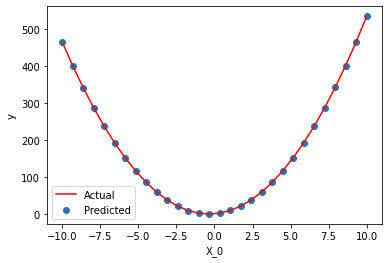

In [7]:
plt.scatter(X, y)
plt.plot(X, pred_y, "r")
plt.xlabel("X_0")
plt.ylabel("y")
plt.legend(["Actual", "Predicted"])
plt.show()